In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

import seaborn as sns
from sklearn.metrics import confusion_matrix

import warnings

In [2]:
def convert_to_integer(value): # Birden fazla dbm_antsignal değerlerinin olduğu durumda dönüşüm işlemi için 
    if pd.isna(value) or value == '':
        return None 
    elif isinstance(value, int) or isinstance(value, float):
        return value
    else:
        signal_strengths = [int(v) for v in value.split('-') if v]
        if signal_strengths:
            average_strength = round(sum(signal_strengths) / len(signal_strengths))
            return -average_strength
        else:
            return None

In [3]:
warnings.filterwarnings('ignore')

In [4]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

selected_features = ['frame.len', 'radiotap.length', 'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'wlan.duration', 'radiotap.present.tsft', 'radiotap.channel.type.cck', 'radiotap.channel.type.ofdm', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected']

### Read AWID2 Trn

In [5]:
awid2trn_data = pd.read_csv("./AWID-CLS-R-Trn/AWID-CLS-R-Trn/1", header=None, names=features, low_memory=False)

awid2trn_data = awid2trn_data.loc[:, selected_features + ['class']]
pd.set_option('display.max_columns', None)

awid2trn_data.head(10)

,frame.len,radiotap.length,radiotap.channel.freq,radiotap.dbm_antsignal,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,class
0,261,26,2437,-47,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
1,185,26,2437,-47,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
2,185,26,2437,-64,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
3,159,26,2437,-32,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
4,54,26,2437,-21,44,1,0,1,2,4,0x01,0,0,0,0,0,normal
5,40,26,2437,-24,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
6,261,26,2437,-47,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
7,40,26,2437,-24,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
8,185,26,2437,-52,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
9,185,26,2437,-58,0,1,1,0,0,8,0x00,0,0,0,0,0,normal


### Read AWID2 Tst

In [6]:
awid2tst_data = pd.read_csv("./AWID-CLS-R-Tst/AWID-CLS-R-Tst/awid2test", header=None, names=features, low_memory=False)

awid2tst_data = awid2tst_data.loc[:, selected_features + ['class']]
pd.set_option('display.max_columns', None)

awid2tst_data.head(10)

,frame.len,radiotap.length,radiotap.channel.freq,radiotap.dbm_antsignal,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,class
0,1552,26,2437,-25,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
1,1552,26,2437,-25,44,1,0,1,2,8,0x02,0,1,0,0,1,normal
2,40,26,2437,-26,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
3,40,26,2437,-26,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
4,1552,26,2437,-26,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
5,1552,26,2437,-25,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
6,1552,26,2437,-25,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
7,1552,26,2437,-26,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
8,40,26,2437,-24,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
9,1552,26,2437,-26,44,1,0,1,2,8,0x02,0,0,0,0,1,normal


### Dropping NaN values

In [7]:
awid2trn_data = awid2trn_data.replace(r'^\s*$', pd.NA, regex=True)
awid2trn_data = awid2trn_data.replace('?', pd.NA)
awid2trn_data = awid2trn_data.dropna()

In [8]:
awid2tst_data = awid2tst_data.replace(r'^\s*$', pd.NA, regex=True)
awid2tst_data = awid2tst_data.replace('?', pd.NA)
awid2tst_data = awid2tst_data.dropna()

### Injection rows removed

In [9]:
filter_train = awid2trn_data['class'] != 'injection'
filter_test = awid2tst_data['class'] != 'injection'
awid2trn_data = awid2trn_data[filter_train]
awid2tst_data = awid2tst_data[filter_test]

### Train Test Split

In [10]:
X_awid2trn = awid2trn_data.loc[:, selected_features]
y_awid2trn = awid2trn_data[['class']]

In [11]:
X_awid2tst = awid2tst_data.loc[:, selected_features]
y_awid2tst = awid2tst_data[['class']]

### Train - Test Merge

In [12]:
# K Fold tekniği kullanılacağı için bütün dataset birleştirildi
X = pd.concat([X_awid2trn, X_awid2tst])
y = pd.concat([y_awid2trn, y_awid2tst])

In [13]:
# X_awid2trn
X

,frame.len,radiotap.length,radiotap.channel.freq,radiotap.dbm_antsignal,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected
0,261,26,2437,-47,0,1,1,0,0,8,0x00,0,0,0,0,0
1,185,26,2437,-47,0,1,1,0,0,8,0x00,0,0,0,0,0
2,185,26,2437,-64,0,1,1,0,0,8,0x00,0,0,0,0,0
3,159,26,2437,-32,0,1,1,0,0,8,0x00,0,0,0,0,0
4,54,26,2437,-21,44,1,0,1,2,4,0x01,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,40,26,2437,-25,0,1,0,1,1,13,0x00,0,0,0,0,0
575639,261,26,2437,-58,0,1,1,0,0,8,0x00,0,0,0,0,0
575640,124,26,2437,-25,44,1,0,1,2,8,0x02,0,0,0,0,1
575641,1524,26,2437,-25,44,1,0,1,2,8,0x02,0,0,0,0,1


In [14]:
X['radiotap.dbm_antsignal'] = X['radiotap.dbm_antsignal'].apply(convert_to_integer)

### Encoding

In [15]:
columns_to_scale = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal', 'wlan.duration']
columns_to_one_hot_encode = [col for col in X.columns if col not in columns_to_scale]

# Min-max scaling
scaler = MinMaxScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X = pd.get_dummies(X, columns=columns_to_one_hot_encode)

### K-Fold Cross-Validation

In [16]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
def calculate_metrics(y_test, y_pred, model, X_test):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1_macro'] = f1_score(y_test, y_pred, average='macro')
    metrics['f1_micro'] = f1_score(y_test, y_pred, average='micro')
    metrics['f1_weighted'] = f1_score(y_test, y_pred, average='weighted')
    metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
    metrics['precision_micro'] = precision_score(y_test, y_pred, average='micro', zero_division=0)
    metrics['precision_weighted'] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
    metrics['recall_micro'] = recall_score(y_test, y_pred, average='micro', zero_division=0)
    metrics['recall_weighted'] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        metrics['auc'] = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_pred_proba, multi_class='ovr')
    elif hasattr(model, "decision_function"):
        y_decision_scores = model.decision_function(X_test)
        metrics['auc'] = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_decision_scores, multi_class='ovr')
    else:
        metrics['auc'] = None

    return metrics

In [18]:
def plot_confusion_matrix(cm, model_name):
    classes = ['Flooding', 'Impersonation', 'Normal']
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, vmax=50000)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Average Confusion Matrix for {model_name}')
    plt.show()

In [19]:
def train_and_evaluate_model(model, X, y, kfold, model_name=""):
    accumulated_metrics = {
        'accuracy': [], 'f1_macro': [], 'f1_micro': [], 'f1_weighted': [],
        'precision_macro': [], 'precision_micro': [], 'precision_weighted': [],
        'recall_macro': [], 'recall_micro': [], 'recall_weighted': [], 'auc': []
    }
    total_cm = np.zeros((len(np.unique(y)), len(np.unique(y))))

    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics = calculate_metrics(y_test, y_pred, model, X_test)
        for key in accumulated_metrics.keys():
            accumulated_metrics[key].append(metrics.get(key, np.nan))

        fold_cm = confusion_matrix(y_test, y_pred)
        total_cm += fold_cm

    average_cm = total_cm / kfold.get_n_splits()
    plot_confusion_matrix(average_cm, model_name)
    
    return accumulated_metrics

In [20]:
def display_average_scores(accumulated_metrics):
    for metric, scores in accumulated_metrics.items():
        print(f"Average {metric.capitalize()}: {np.nanmean(scores):.4f}")

### Decision Tree

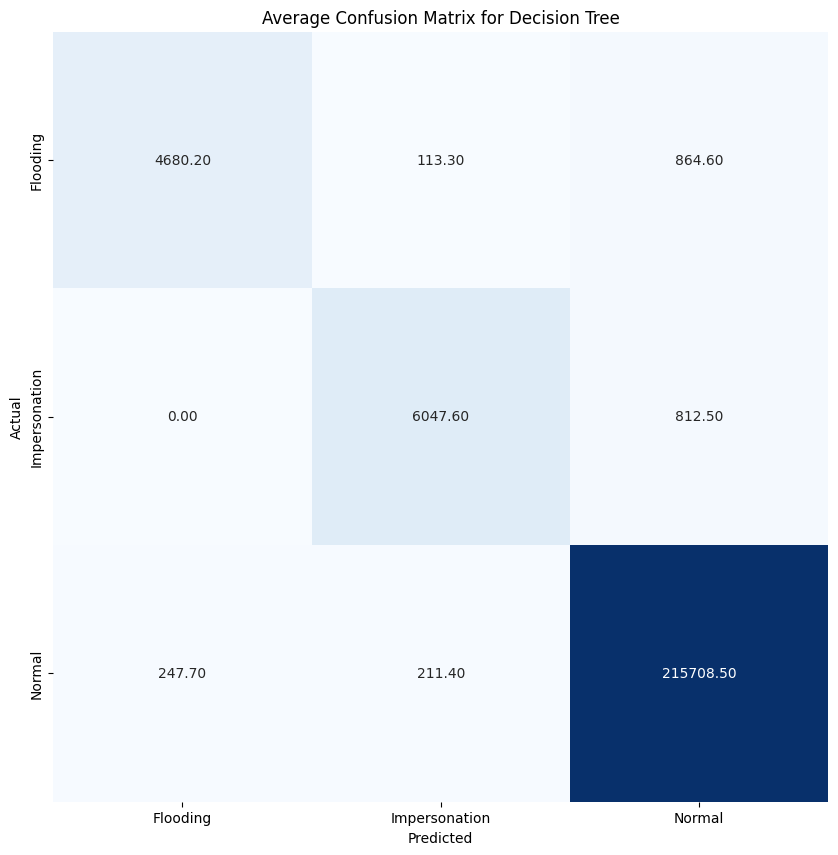

Average Accuracy: 0.9902
Average F1_macro: 0.9311
Average F1_micro: 0.9902
Average F1_weighted: 0.9899
Average Precision_macro: 0.9637
Average Precision_micro: 0.9902
Average Precision_weighted: 0.9899
Average Recall_macro: 0.9022
Average Recall_micro: 0.9902
Average Recall_weighted: 0.9902
Average Auc: 0.9926


In [21]:
# y = y['class'].astype('category').cat.codes

# Belirli parametrelerle dt modeli
dt_model = DecisionTreeClassifier(
    max_depth=20,
    ccp_alpha=0.001,
    max_leaf_nodes=100,
    min_samples_leaf=2,
    random_state=42
)

accumulated_metrics = train_and_evaluate_model(dt_model, X, y, kfold, "Decision Tree")

display_average_scores(accumulated_metrics)

### LightGBM

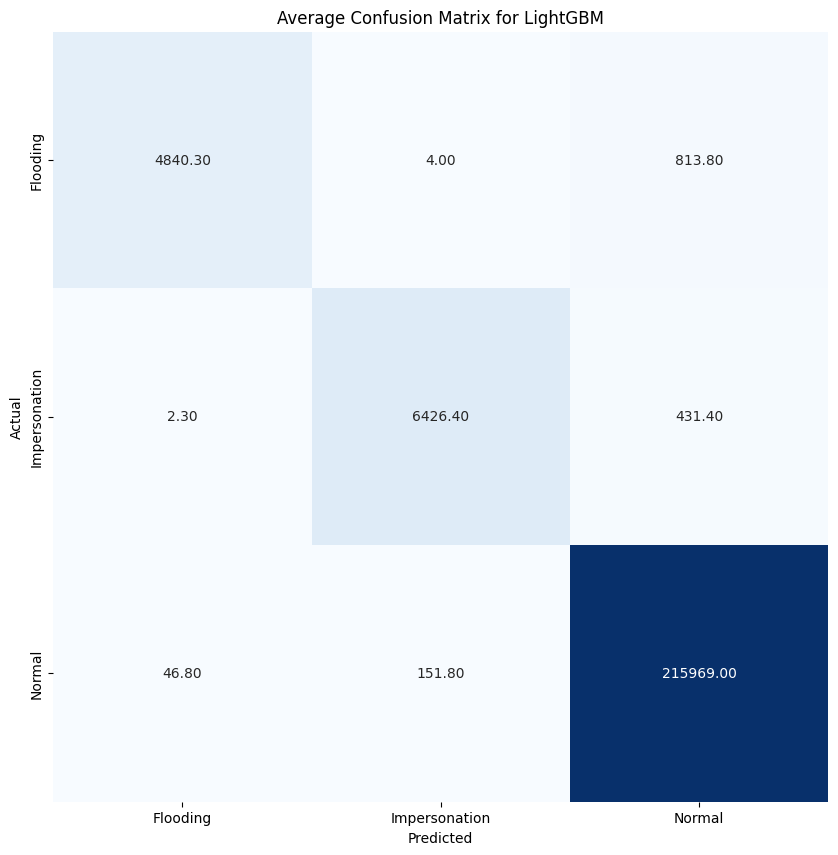

Average Accuracy: 0.9937
Average F1_macro: 0.9569
Average F1_micro: 0.9937
Average F1_weighted: 0.9935
Average Precision_macro: 0.9869
Average Precision_micro: 0.9937
Average Precision_weighted: 0.9936
Average Recall_macro: 0.9304
Average Recall_micro: 0.9937
Average Recall_weighted: 0.9937
Average Auc: 0.9993


In [22]:
# LightGBM modeli için parametreler
# y = y['class'].astype('category').cat.codes

lgb_params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 20,
    'learning_rate': 0.01,
    'max_bin': 20,
    'max_depth': 10,
    'min_child_samples': 30,
    'min_data_in_bin': 10,
    'min_split_gain': 0.1,
    'n_estimators': 80,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'n_jobs': 1,
    'verbose': 0
}

lgb_model = LGBMClassifier(**lgb_params)

accumulated_metrics = train_and_evaluate_model(lgb_model, X, y, kfold, "LightGBM")

display_average_scores(accumulated_metrics)

### Logistic Regression

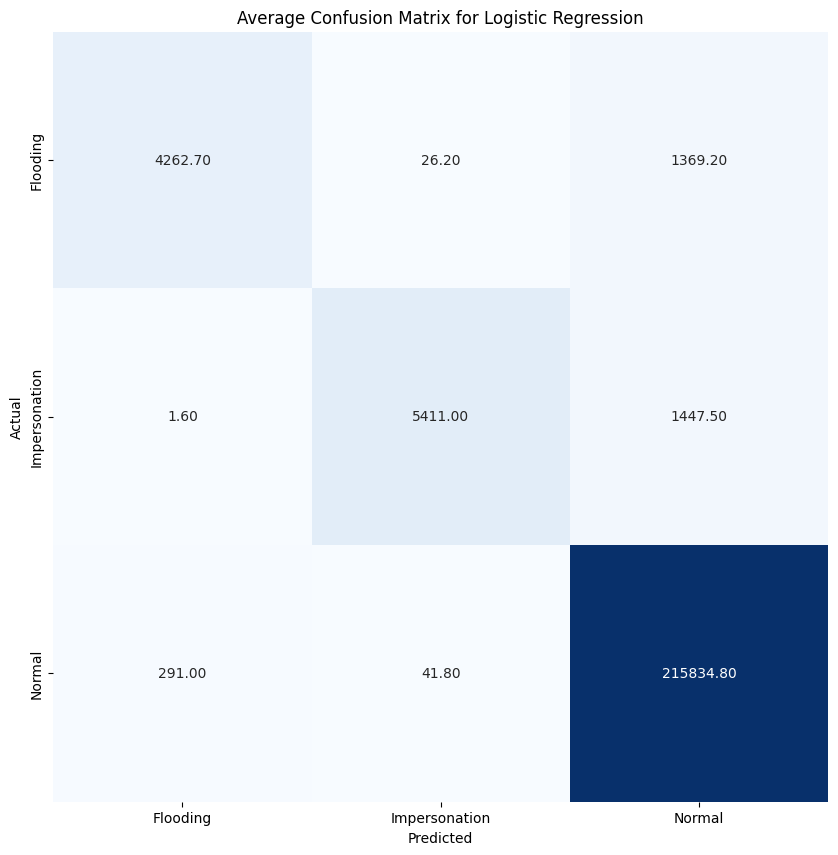

Average Accuracy: 0.9861
Average F1_macro: 0.9013
Average F1_micro: 0.9861
Average F1_weighted: 0.9854
Average Precision_macro: 0.9721
Average Precision_micro: 0.9861
Average Precision_weighted: 0.9860
Average Recall_macro: 0.8469
Average Recall_micro: 0.9861
Average Recall_weighted: 0.9861
Average Auc: 0.9966


In [23]:
# y = y['class'].astype('category').cat.codes

lr_model = LogisticRegression(
    solver='sag',
    max_iter=1000,
    tol=0.01,
    random_state=42,
    multi_class='multinomial'
)

accumulated_metrics = train_and_evaluate_model(lr_model, X, y, kfold, "Logistic Regression")

display_average_scores(accumulated_metrics)

### SGDClassifier

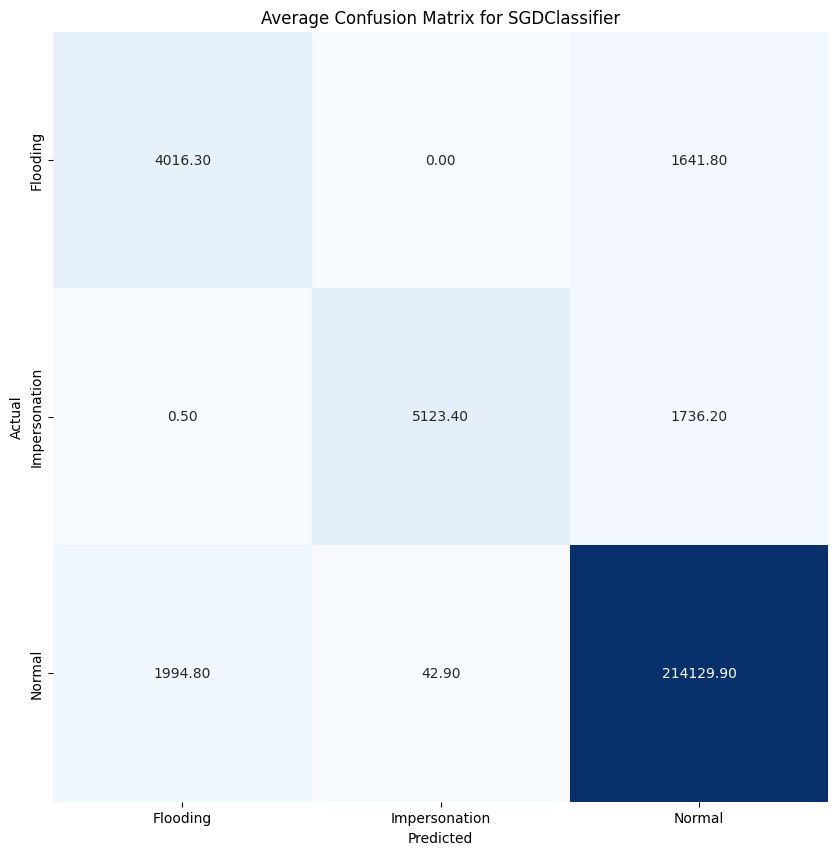

Average Accuracy: 0.9763
Average F1_macro: 0.8427
Average F1_micro: 0.9763
Average F1_weighted: 0.9760
Average Precision_macro: 0.8838
Average Precision_micro: 0.9763
Average Precision_weighted: 0.9770
Average Recall_macro: 0.8157
Average Recall_micro: 0.9763
Average Recall_weighted: 0.9763
Average Auc: 0.9880


In [24]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# y_train = y_train['class'].astype('category').cat.codes
# y_test = y_test['class'].astype('category').cat.codes

sgd_model = SGDClassifier(
    tol=1e-05,
    loss='modified_huber',
    early_stopping=True,
    random_state=42
)

accumulated_metrics = train_and_evaluate_model(sgd_model, X, y, kfold, "SGDClassifier")

display_average_scores(accumulated_metrics)

### LinearSVC

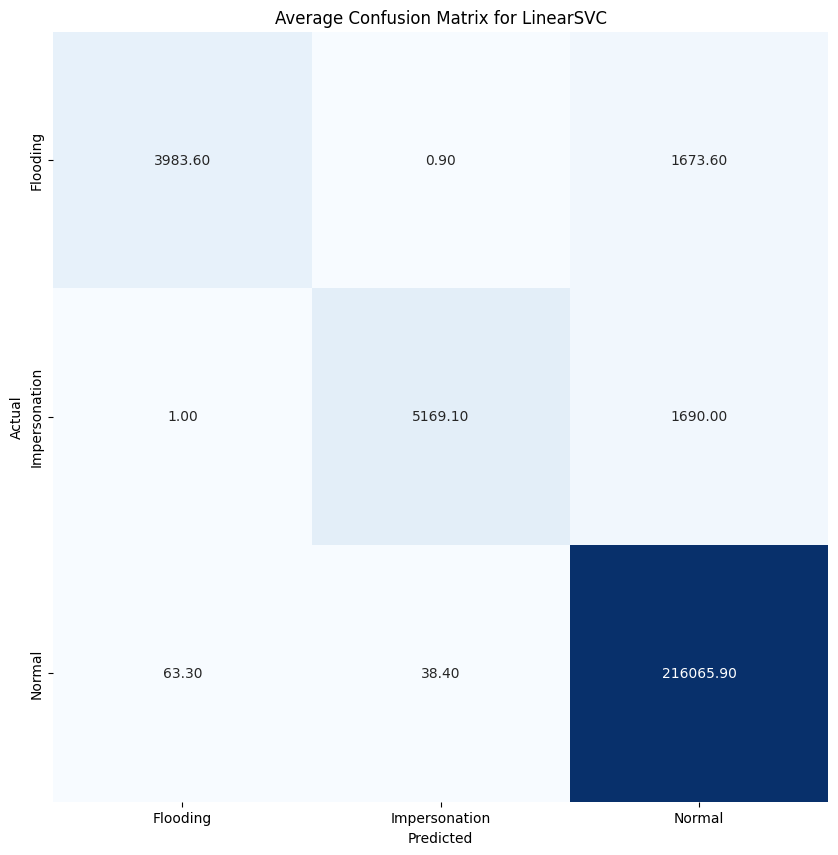

Average Accuracy: 0.9848
Average F1_macro: 0.8898
Average F1_micro: 0.9848
Average F1_weighted: 0.9837
Average Precision_macro: 0.9871
Average Precision_micro: 0.9848
Average Precision_weighted: 0.9849
Average Recall_macro: 0.8190
Average Recall_micro: 0.9848
Average Recall_weighted: 0.9848
Average Auc: 0.9961


In [25]:
# y_train = y_train['class'].astype('category').cat.codes
# y_test = y_test['class'].astype('category').cat.codes

linear_svc_model = LinearSVC(
    max_iter=20000,
    C=1.5,
    random_state=42
)

accumulated_metrics = train_and_evaluate_model(linear_svc_model, X, y, kfold, "LinearSVC")

display_average_scores(accumulated_metrics)

### Random Forest

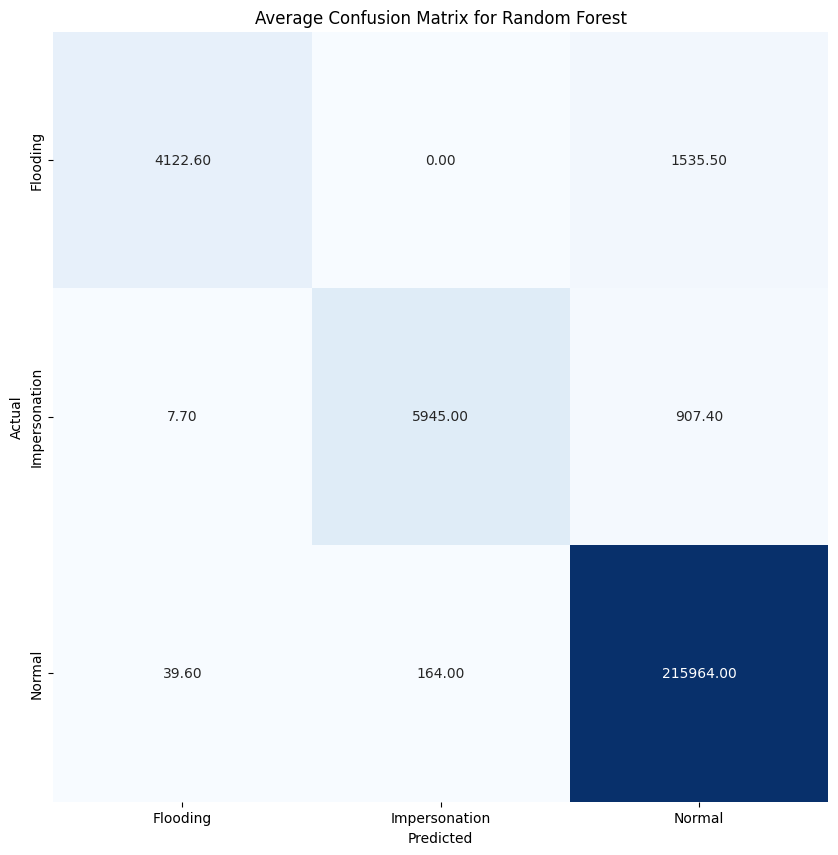

Average Accuracy: 0.9884
Average F1_macro: 0.9163
Average F1_micro: 0.9884
Average F1_weighted: 0.9877
Average Precision_macro: 0.9837
Average Precision_micro: 0.9884
Average Precision_weighted: 0.9884
Average Recall_macro: 0.8648
Average Recall_micro: 0.9884
Average Recall_weighted: 0.9884
Average Auc: 0.9987


In [26]:
# y_train = y_train['class'].astype('category').cat.codes
# y_test = y_test['class'].astype('category').cat.codes

# Belirli parametreler ile Random Forest
random_forest_model = RandomForestClassifier(
    max_depth=20,
    ccp_alpha=0.001,
    max_leaf_nodes=100,
    min_samples_leaf=2,
    random_state=42
)

accumulated_metrics = train_and_evaluate_model(random_forest_model, X, y, kfold, "Random Forest")

display_average_scores(accumulated_metrics)

### Extra Trees

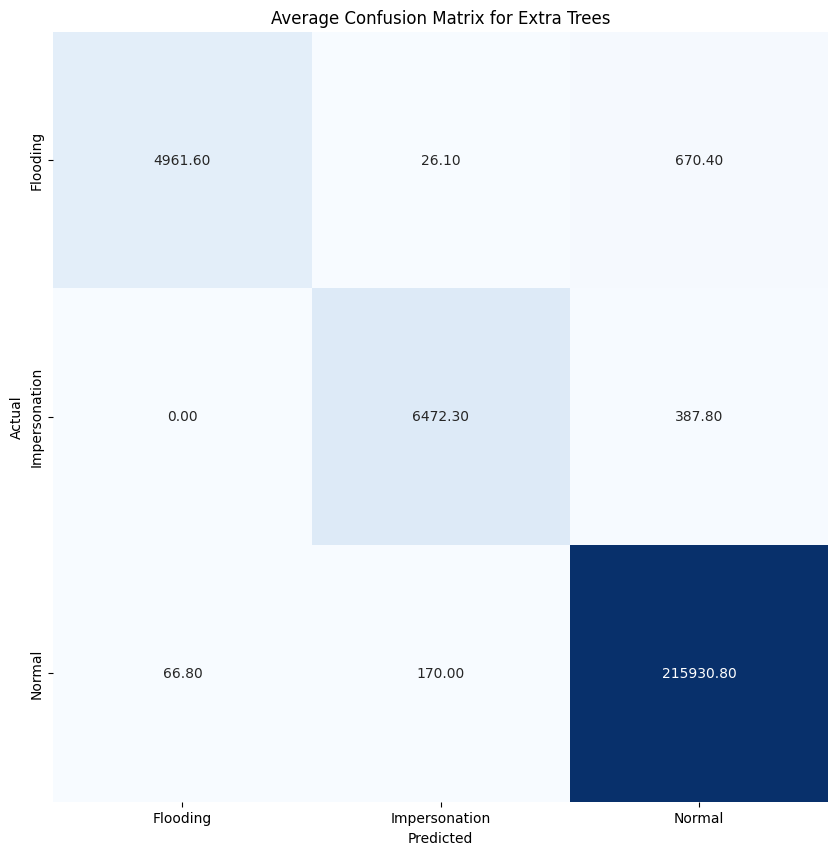

Average Accuracy: 0.9942
Average F1_macro: 0.9608
Average F1_micro: 0.9942
Average F1_weighted: 0.9941
Average Precision_macro: 0.9841
Average Precision_micro: 0.9942
Average Precision_weighted: 0.9942
Average Recall_macro: 0.9398
Average Recall_micro: 0.9942
Average Recall_weighted: 0.9942
Average Auc: 0.9994


In [27]:
# y_train = y_train['class'].astype('category').cat.codes
# y_test = y_test['class'].astype('category').cat.codes

# Belirli hiperparametreler ile ET model
et_model = ExtraTreesClassifier(
    max_depth=200,
    n_estimators=200,
    ccp_alpha=0.0001,
    max_leaf_nodes=500,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

accumulated_metrics = train_and_evaluate_model(et_model, X, y, kfold, "Extra Trees")

display_average_scores(accumulated_metrics)